<h1>Import all libraries and reading explored data into Dataframe</h1>

In [1]:
import re
import io

#General libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import preprocessing

#Libraries for data pre-processing (Log Loss)
from sklearn.datasets import make_blobs
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

#For Random Forest implementation
from sklearn.ensemble import RandomForestClassifier

#For Baseline implementation
from sklearn.dummy import DummyClassifier

#For Logistic Regression
from sklearn.linear_model import LogisticRegression

#For Ensemble
from sklearn.ensemble import VotingClassifier

#Settings
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(threshold=np.nan)
sns.set()

def printModelAccuracy(y_test, y_pred):
    # Find the confusion matrix of the result
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5]), \
        index=['true:1', 'true:2', 'true:3', 'true:4', 'true:5'], 
        columns=['pred:1', 'pred:2', 'pred:3', 'pred:4', 'pred:5'])
    print("Confusion Matrix:")
    print(cm)

    # Find the accuracy and F1 score of the result
    asr = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    print("Accuracy:", asr)
    print("F1:", f1)
    """
    # Log loss
    score = log_loss(y_test, y_pred)
    print("Log Loss:", score)
    """
    
# Read from dataframe
dfnum = pd.read_pickle("../3. Exploratory Data Analysis/explored_data")
dfnum = dfnum.replace([np.inf, -np.inf, np.nan], 0) #removing infinite/nan values
df = dfnum.drop(['id'], 1) # use only num data

# Check the columns using dtypes
print(df.dtypes)
# Randomly sample 5 records with .sample(5)
df.sample(5)

budget        float64
vote_count    float64
bin           float64
dtype: object


,budget,vote_count,bin
14674,-0.40,-0.27,5.00
2463,0.33,-0.27,5.00
19033,-0.40,-0.27,5.00
11967,-0.40,-0.20,4.00
9752,-0.28,0.30,5.00


## Process Files for Experiment E & F
E: Numerical data + only genres and production companies (without PCA)


In [ ]:
# Combine datasets into one df (without PCA)

# Read from text dataframes (before PCA)
print("dfnum")
print(dfnum.shape)

dfgenres = pd.read_pickle("../2. Data Preprocessing/dfgenres")
dfgenres.columns = [x[0] for x in dfgenres.columns]
dfgenres = dfgenres.sort_values('id')
dfgenres.drop(['title'], 1, inplace=True) # keep id here as genres has no missing values
# print(dfgenres.sample(5))
print("dfgenres")
print(dfgenres.shape)

dfproductioncompanies_s = pd.read_pickle("../2. Data Preprocessing/dfproductioncompaniesmostcommon")
dfproductioncompanies_s.columns = [x[0] for x in dfproductioncompanies_s.columns]
dfproductioncompanies_s = dfproductioncompanies_s.sort_values('id')
dfproductioncompanies_s.drop(['title'], 1, inplace=True)
# print(dfproductioncompanies_s.sample(5))
print("dfproductioncompanies_s")
print(dfproductioncompanies_s.shape)

# Combine dataframes
final_df = pd.merge(dfgenres, dfproductioncompanies_s, on='id', how='left')
final_df["id"] = pd.to_numeric(final_df["id"])
final_df = final_df.replace([np.inf, -np.inf, np.nan], 0) #removing infinite/nan values
print("final_df without dfnum")
print(final_df.shape)

final_df = pd.merge(dfnum, final_df, on='id', how='left')
final_df = final_df.replace([np.inf, -np.inf, np.nan], 0) #removing infinite/nan values
print("final_df with dfnum")
print(final_df.shape)

final_df.to_pickle("withoutpca_imptdata")

final_df = final_df.drop(['vote_count'], 1)
final_df.to_pickle("withoutpcavotecount_imptdata")

# Check the columns using dtypes
print(final_df.dtypes)

# Randomly sample 5 records with .sample(5)
print(final_df.sample(5))

<h1>Process Files for Experiment B & C</h1>

In [ ]:
# Combine datasets into one df (without PCA)

# Read from text dataframes (before PCA)
print("dfnum")
print(dfnum.shape)

dfcasts = pd.read_pickle("../2. Data Preprocessing/dfcasts")
dfcasts.columns = [x[0] for x in dfcasts.columns]
dfcasts = dfcasts.sort_values('id')
# dfcasts.drop(['id'], 1, inplace=True)
# print(dfcasts.sample(5))
print("dfcasts")
print(dfcasts.shape)

dfdirectors = pd.read_pickle("../2. Data Preprocessing/dfdirectors")
dfdirectors.columns = [x[0] for x in dfdirectors.columns]
dfdirectors = dfdirectors.sort_values('id')
# dfdirectors.drop(['id'], 1, inplace=True)
# print(dfdirectors.sample(5))
print("dfdirectors")
print(dfdirectors.shape)

dfgenres = pd.read_pickle("../2. Data Preprocessing/dfgenres")
dfgenres.columns = [x[0] for x in dfgenres.columns]
dfgenres = dfgenres.sort_values('id')
dfgenres.drop(['title'], 1, inplace=True) # keep id here as genres has no missing values
# print(dfgenres.sample(5))
print("dfgenres")
print(dfgenres.shape)

dfoverview_s = pd.read_pickle("../2. Data Preprocessing/dfoverviewmostcommon")
dfoverview_s.columns = [x[0] for x in dfoverview_s.columns]
dfoverview_s = dfoverview_s.sort_values('id')
dfoverview_s.drop(['title'], 1, inplace=True)
# print(dfoverview_s.sample(5))
print("dfoverview_s")
print(dfoverview_s.shape)

dfproductioncompanies_s = pd.read_pickle("../2. Data Preprocessing/dfproductioncompaniesmostcommon")
dfproductioncompanies_s.columns = [x[0] for x in dfproductioncompanies_s.columns]
dfproductioncompanies_s = dfproductioncompanies_s.sort_values('id')
dfproductioncompanies_s.drop(['title'], 1, inplace=True)
# print(dfproductioncompanies_s.sample(5))
print("dfproductioncompanies_s")
print(dfproductioncompanies_s.shape)

# COMMENTED OUT overview & production companies because of MEMORY ERROR
"""
dfoverview = pd.read_pickle("../2. Data Preprocessing/dfoverview")
dfoverview.columns = [x[0] for x in dfoverview.columns]
dfoverview = dfoverview.sort_values('id')
dfoverview.drop(['title'], 1, inplace=True)
# print(dfoverview.sample(5))
print("dfoverview")
print(dfoverview.shape)

dfproductioncompanies = pd.read_pickle("../2. Data Preprocessing/dfproductioncompanies")
dfproductioncompanies.columns = [x[0] for x in dfproductioncompanies.columns]
dfproductioncompanies = dfproductioncompanies.sort_values('id')
dfproductioncompanies.drop(['title'], 1, inplace=True)
# print(dfproductioncompanies.sample(5))
print("dfproductioncompanies")
print(dfproductioncompanies.shape)
"""

# Combine dataframes
casts_directors = pd.merge(dfcasts, dfdirectors, on='id', how='left')
cd_genres = pd.merge(casts_directors, dfgenres, on='id', how='right')
overview_productioncompanies = pd.merge(dfoverview_s, dfproductioncompanies_s, on='id', how='left')
final_df = pd.merge(cd_genres, overview_productioncompanies, on='id', how='right')

final_df["id"] = pd.to_numeric(final_df["id"])
final_df = final_df.replace([np.inf, -np.inf, np.nan], 0) #removing infinite/nan values
print("final_df without dfnum")
print(final_df.shape)

final_df = pd.merge(dfnum, final_df, on='id', how='left')
final_df = final_df.replace([np.inf, -np.inf, np.nan], 0) #removing infinite/nan values
print("final_df with dfnum")
print(final_df.shape)

final_df.to_pickle("withoutpca_data")

final_df = final_df.drop(['budget_x', 'vote_count'], 1)
final_df.to_pickle("withoutpca_textdata")

# Check the columns using dtypes
print(final_df.dtypes)

# Randomly sample 5 records with .sample(5)
print(final_df.sample(5))

<h1>Read Experiment A</h1>

In [ ]:
# Use categorical & numerical attributes only
df = pd.read_pickle("../3. Exploratory Data Analysis/explored_data")
df = df.drop(['id'], 1)

print(df.columns.values)

<h1>Read Experiment B</h1>

In [ ]:
# Use textual attributes only
df = pd.read_pickle("withoutpca_textdata")
df = df.drop(['id'], 1)

print(df.columns.values)

<h1>Read Experiment C</h1>

In [ ]:
# Use concatenation of (1) categorical & numerical attributes, and (2) TF-IDF vectors
df = pd.read_pickle("withoutpca_data")
df = df.drop(['id'], 1)

print(df.columns.values)

<h1>Read Experiment D</h1>

In [ ]:
# Use concatenation of (1) categorical & numerical attributes, 
# and (2) lower dimension vector after performing dimension reduction on original TF-IDF vector
df = pd.read_pickle("../3. Exploratory Data Analysis/pca_data")
df = df.drop(['id'], 1)

print(df.columns.values)

<h1>Read Experiment E</h1>

In [ ]:
# Use concatenation of (1) categorical & numerical attributes, 
# and (2) lower dimension vector after performing dimension reduction on original TF-IDF vector (no pca, casts, directors, overview)
df = pd.read_pickle("withoutpca_imptdata")
df = df.drop(['id'], 1)

print(df.columns.values)

<h1>Read Experiment F</h1>

In [ ]:
# Use concatenation of (1) categorical & numerical attributes, 
# and (2) lower dimension vector after performing dimension reduction on original TF-IDF vector  (no pca, casts, directors, overview, vote count)
df = pd.read_pickle("withoutpcavotecount_imptdata")
df = df.drop(['id'], 1)

print(df.columns.values)

<h1>Find out the number of records per revenue bin. </h1>

   bin     n
0 1.00  3914
1 2.00  3915
2 3.00  3908
3 4.00  3911
4 5.00  3912


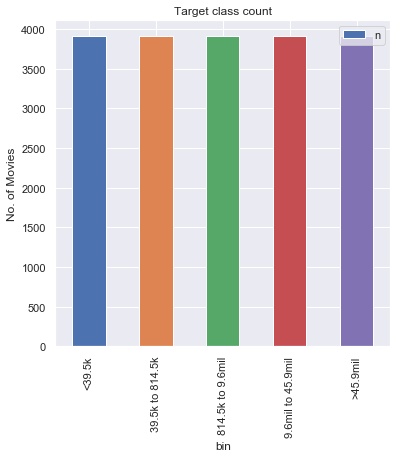

In [3]:
# Using groupby, find out the number of reviews with
# positive and negative sentiment respectively.
df_target = df.groupby('bin').size().reset_index(name='n')
print(df_target)

# How many patients in the dataset have been diagnosed positive and negative for diabetes?
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)
df_target.plot(kind='bar', x='bin', y='n', title = "Target class count", ax=ax1)
ax1.set_ylabel("No. of Movies")
plt.xticks(np.arange(0,5), ["<39.5k", "39.5k to 814.5k", "814.5k to 9.6mil", "9.6mil to 45.9mil", ">45.9mil"])
plt.show()

<h1>Train-Test Split</h1>

In [ ]:
X = df.loc[:, df.columns != 'bin']
y = df[['bin']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
X_train.to_pickle("X_train")
X_test.to_pickle("X_test")
y_train.to_pickle("y_train")
y_test.to_pickle("y_test")

In [ ]:
# Read from dataframe    
X_test = pd.read_pickle("X_test")
X_train = pd.read_pickle("X_train")
y_test = pd.read_pickle("y_test")
y_train = pd.read_pickle("y_train")

<h1>Baseline Classifier (Decision Tree)</h1>

In [ ]:
parameters = {
    'criterion': ['gini', 'entropy'] #entropy better than gini
}

decisionTree = GridSearchCV(DecisionTreeClassifier(), cv=5, param_grid=parameters)
#Fit the training feature Xs and training label Ys
decisionTree.fit(X_train, y_train.values.ravel())

#Use the trained model to predict the test data
y_pred = decisionTree.predict(X_test)

# Find the confusion matrix, the accuracy, and F1 score of the result
printModelAccuracy(y_test, y_pred)

# Best hyperparameters to use for model
print("Best Parameters:",decisionTree.best_params_)